<a href="https://colab.research.google.com/github/Tamizhan-E/SEEDED-or-SEEDLESS-VISUAL-CLASSIFICATION-OF-FRUITS-USING-TRANSFERV-AND-EXPLAINLABLE-DEEP-LEARNING-/blob/main/Seeded_vs_Seedless_Fruit_Classifier_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seeded vs Seedless Fruit Classification using Deep Learning
This notebook uses EfficientNetB0 and ResNet50 to classify fruit images as **seeded** or **seedless**. It includes model training and Grad-CAM visualization for interpretability.

In [ ]:

!pip install --upgrade tensorflow
!pip uninstall tensorflow
!pip install tensorflow

from keras.preprocessing.image import ImageDataGenerator
!pip install keras==<compatible_version>



!pip install --upgrade tensorflow
!pip uninstall tensorflow
!pip install tensorflow

from keras.preprocessing.image import ImageDataGenerator
!pip install keras==<compatible_version>

from keras.preprocessing.image import ImageDataGenerator
!pip install keras==<compatible_version>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency reso

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.11/dist-packages/keras/api/preprocessing/image/__init__.py)

## Step 1: Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


## Step 2: Load Dataset
Make sure your dataset is structured like this:
```
dataset/
    seeded/
    seedless/
```
Upload the dataset to Colab manually or use Google Drive.

In [ ]:
# If using Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
!pip install kagglehub
import kagglehub

# Download again (this creates a fresh directory)
path = kagglehub.dataset_download("moltean/fruits")
print("Dataset downloaded to:", path)





Dataset downloaded to: /kaggle/input/fruits


## Step 3: Data Preparation

In [ ]:
import os

base_path = path  # This replaces the hardcoded '/root/.cache/...' path
print("Level 1:", os.listdir(base_path))

lvl2_path = os.path.join(base_path, 'fruits-360_original-size')
print("\nLevel 2:", os.listdir(lvl2_path))

lvl3_path = os.path.join(lvl2_path, 'fruits-360-original-size')
print("\nLevel 3:", os.listdir(lvl3_path))


Level 1: ['fruits-360_100x100', 'fruits-360_3-body-problem', 'fruits-360_dataset_meta', 'fruits-360_original-size', 'fruits-360_multi']

Level 2: ['fruits-360-original-size']

Level 3: ['Papers', 'LICENSE', 'Validation', 'Training', 'README.md', 'Test']


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Navigate to correct folder
dataset_path = os.path.join(path, 'fruits-360_original-size', 'fruits-360-original-size', 'Training')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 21748 images belonging to 80 classes.
Found 5407 images belonging to 80 classes.


## Step 5: Train Models - EfficientNetB0 & ResNet50

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(80, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,152,051 (15.84 MB)

 Trainable params: 102,480 (400.31 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history = model.fit(
    train_gen,
    epochs=2,  # Increase this if you have more time
    validation_data=val_gen,
    verbose=1
)


Epoch 1/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 2080s 3s/step - accuracy: 0.0166 - loss: 4.3904 - val_accuracy: 0.0170 - val_loss: 4.3648
Epoch 2/2
680/680 ━━━━━━━━━━━━━━━━━━━━ 1986s 3s/step - accuracy: 0.0178 - loss: 4.3793 - val_accuracy: 0.0176 - val_loss: 4.3693


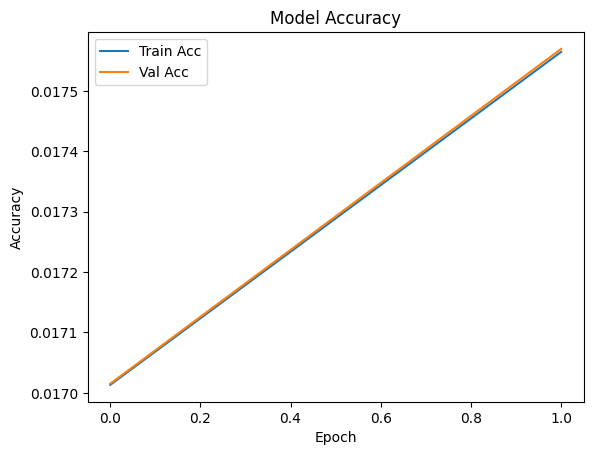

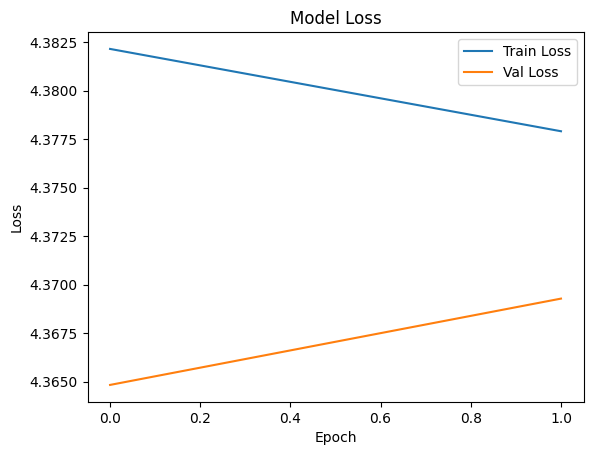

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


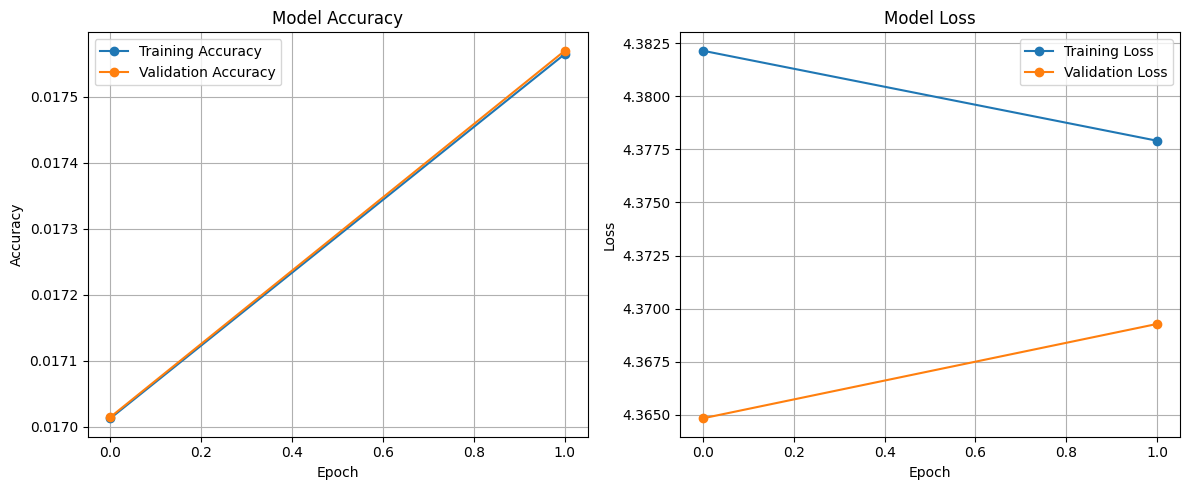

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


169/169 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step


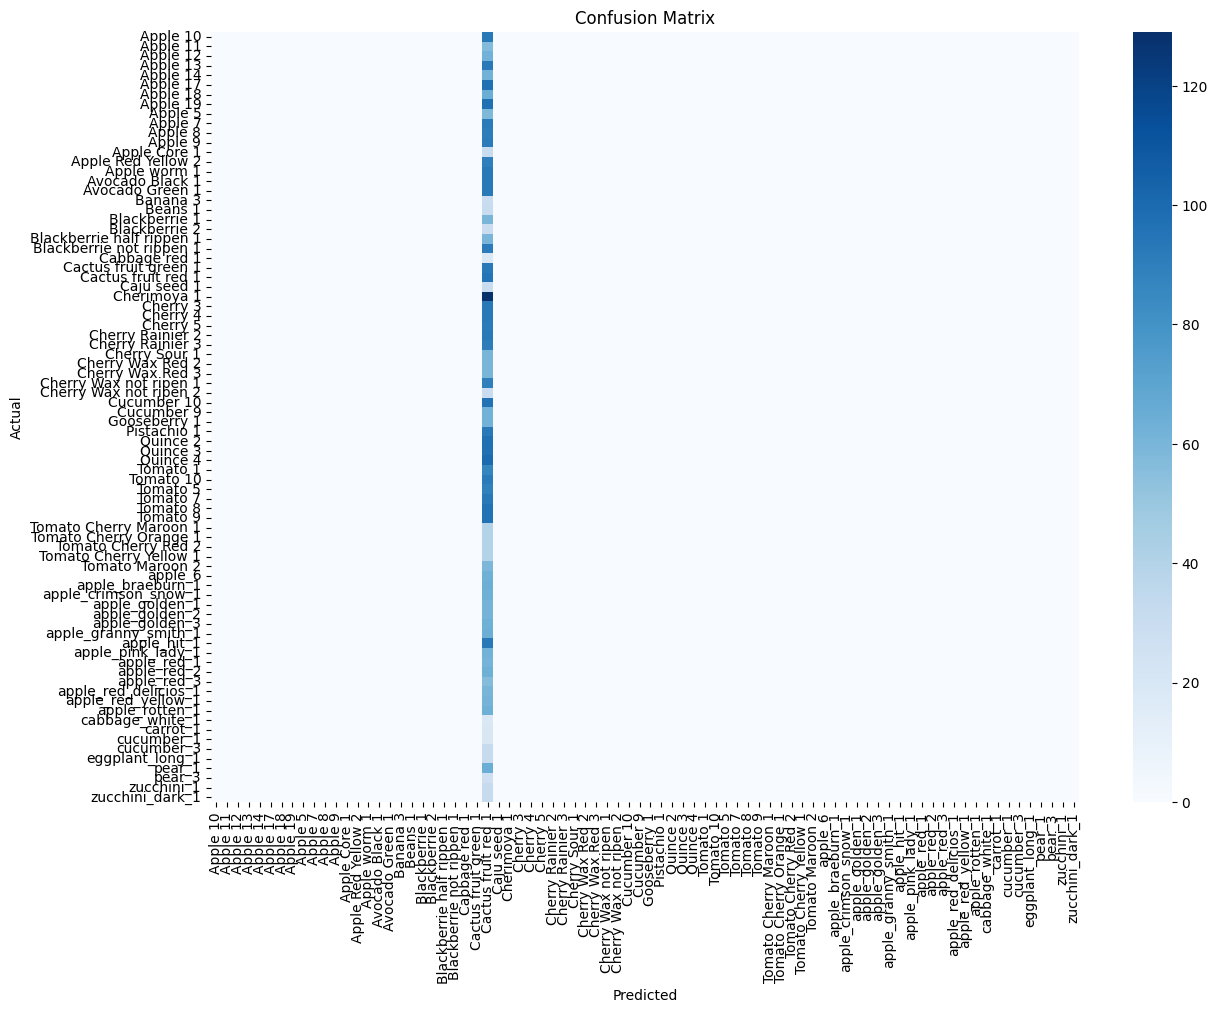

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Classification Report (Precision, Recall, F1-Score, Accuracy):

                           precision    recall  f1-score   support

                 Apple 10       0.00      0.00      0.00        93
                 Apple 11       0.00      0.00      0.00        57
                 Apple 12       0.00      0.00      0.00        62
                 Apple 13       0.00      0.00      0.00        93
                 Apple 14       0.00      0.00      0.00        62
                 Apple 17       0.00      0.00      0.00        97
                 Apple 18       0.00      0.00      0.00        65
                 Apple 19       0.00      0.00      0.00        97
                  Apple 5       0.00      0.00      0.00        58
                  Apple 7       0.00      0.00      0.00        92
                  Apple 8       0.00      0.00      0.00        91
                  Apple 9       0.00      0.00      0.00        92
             Apple Core 1       0.00      0.00      0.00       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns

# Get true labels and predictions
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

# Class labels
class_labels = list(val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("\nClassification Report (Precision, Recall, F1-Score, Accuracy):\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # use 'weighted' for imbalanced classes
recall = recall_score(y_true, y_pred, average='macro')

print(f"\nOverall Accuracy: {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")

# ROC AUC Score (only works for binary or one-vs-rest multi-class)
try:
    y_true_bin = tf.keras.utils.to_categorical(y_true, num_classes=len(class_labels))
    roc_auc = roc_auc_score(y_true_bin, y_pred_probs, multi_class='ovr')
    print(f"ROC AUC Score (OvR): {roc_auc:.4f}")
except:
    print("ROC AUC couldn't be computed — possibly due to class imbalance or single-class output.")
